# Tâche 6

### Ce notebook trace le diagramme de diffraction des rayons X pour le NaInS2. 

### On affiche les trois premiers pics de diffraction Pour une longueur d’onde de 1.5406 Å (Cu Kα)

### On indique aussi leurs angles 2θ (angle entre la direction incidente et la direction observée), leurs intensités, leurs indices de plan (hkil) et la multiplicité (le nombre de plan équivalent qui contribuent au pic de diffraction)

### On utilise les rayons X car leur longueur d'onde est de l'ordre de la distance interatomiques

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

voici un lien pour télécharger un fichier CIF avec la structure cristalline du matériaux


/home/users/r/p/rperger/mp-20289.cif

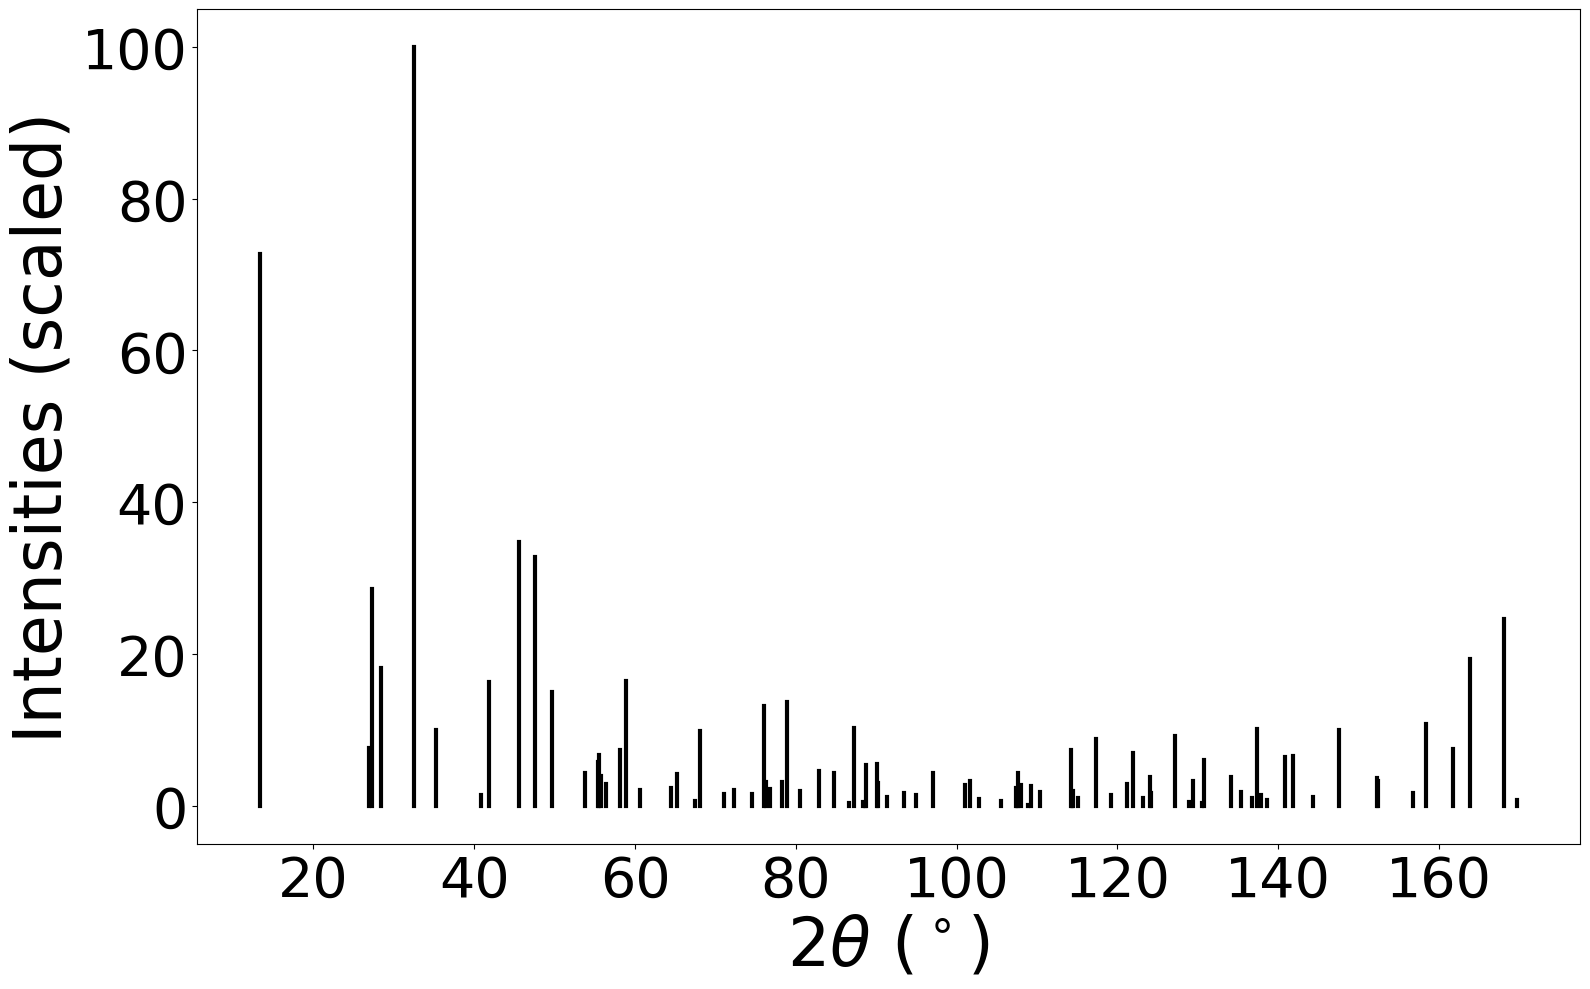

Pic 1
Angle : 13.345465386001756 degrés
Intensité : 72.70090408652032%
hkil : (0, 0, 0, 3)
Multiplicité : 2
 
Pic 2
Angle : 26.87636730713775 degrés
Intensité : 7.653340629298188%
hkil : (0, 0, 0, 6)
Multiplicité : 2
 
Pic 3
Angle : 27.328970216658078 degrés
Intensité : 28.575241293371782%
hkil : (1, 0, -1, 1)
Multiplicité : 12
 


In [5]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from IPython.display import FileLink
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import matplotlib.pyplot as plt 

# la variable key est la clé API pour accéder à la base de données Materials Project
key = "kHK7l7itQo2c5bLbQQIsHOTh5cQ7HUnw"

# la variable material est la variable qui contient l'identifiant du materiau NaINS2
material = "mp-20289"

# On crée un objet MPRester qui permet de communiquer avec l'API
m = MPRester(key)

# On récupère la structure cristalline du matériau sous forme de cellule conventionnelle(plus grande et plus symétrique que le cellule primitive)
struct = m.get_structure_by_material_id(material, conventional_unit_cell=True)

# On crée un fichier CIF (format pour les structures cristallines)
w = CifWriter(struct)

# On enregistre la structure dans un fichier 
w.write_file(material+".cif")

# On affiche un lien pour télécharger le fichier CIF généré
print("voici un lien pour télécharger un fichier CIF avec la structure cristalline du matériaux")
display(FileLink(material+".cif"))

# On crée un objet XRDCalculator qui permet de simuler un diagramme de diffraction des rayons X
# On utilise une longueur d'onde de 1.54060 Å correspondant à celle du rayonnement Cu Kα
xrd = XRDCalculator(1.54060)

# On génère le diagramme de diffraction du matériau étudié
dif = xrd.get_pattern(struct)

# On affiche le diagramme de diffraction avec les pics observés
fig = xrd.get_plot(struct, annotate_peaks=False, two_theta_range=[0, 180])  
plt.show() 
# On récupère et affiche les informations sur les trois premiers pics de diffraction
for i in range(3):
    print("Pic " + str(i+1))
    print("Angle : " + str(dif.x[i]) + " degrés")  # On affiche l'angle 2θ du pic
    print("Intensité : " + str(dif.y[i]) + "%")  # On affiche l'intensité relative du pic
    print("hkil : " + str(dif.hkls[i][0]["hkl"]))  # On affiche les indices hkl, ici comme le NaInS2 a une structure trigonal rhomboédrique décrite avec une maille hexagonale,on aura 4 indices
    print("Multiplicité : " + str(dif.hkls[i][0]["multiplicity"]))  # On indique le nombre de plans équivalents contribuant au pic
    print(" ")
